In [1]:
# coding: utf-8

# # Integration with sklearn pipelines
# 
# In this notebook, provide some illustration for integration with sklearn pipelines.

# In[1]:


import keras
import imblearn

import numpy as np

import smote_variants as sv
import imblearn.datasets as imb_datasets

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

random_seed= 3


# ## Preparing the data

# In[2]:


np.random.seed(random_seed)


# In[3]:


libras= imb_datasets.fetch_datasets()['libras_move']
X, y= libras['data'], libras['target']


# In[4]:


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.33)


# ## Fitting a pipeline

# In[5]:


oversampler= sv.MulticlassOversampling(sv.distance_SMOTE())
classifier= KNeighborsClassifier(n_neighbors= 5)


# In[6]:


model= Pipeline([('scale', StandardScaler()), ('clf', sv.OversamplingClassifier(oversampler, classifier))])


# In[7]:


model.fit(X, y)


# ## Grid search

# In[8]:


param_grid= {'clf__oversampler':[sv.distance_SMOTE(proportion=0.5),
                                 sv.distance_SMOTE(proportion=1.0),
                                 sv.distance_SMOTE(proportion=1.5)]}


# In[9]:


grid= GridSearchCV(model, param_grid= param_grid, cv= 3, n_jobs= 1, verbose= 2, scoring= 'accuracy')


# In[10]:


grid.fit(X, y)


# In[11]:


print(grid.best_score_)
print(grid.cv_results_)

2022-07-24 18:04:17,340:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2022-07-24 18:04:17,341:INFO:MulticlassOversampling: Sampling minority class with label: 1
2022-07-24 18:04:17,343:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-07-24 18:04:17,366:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-07-24 18:04:17,382:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-07-24 18:04:17,398:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-07-24 18:04:17,412:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'rand

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.5, 'n_neighbors': 5, 'n_jobs': 1

2022-07-24 18:04:17,554:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
0.9222222222222222
{'mean_fit_time': array([0.00834839, 0.01451961, 0.01799043]), 'std_fit_time': array([0.00125925, 0.00151107, 0.00244795]), 'mean_score_time': array([0.00647672, 0.00599543, 0.00699441]), 'std_score_time': array([5.44100706e-05, 1.12391596e-07, 2.15788301e-03]), 'param_clf__oversampler': masked_array(data=[<smote_variants._smote_variants.distance_SMOTE object at 0x00000148C5F8A2C0>,
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'clf__oversampler': <smote_variants._smote_variants.distance_SMOTE object at 0x00000148C5F8A2C0>}, {'clf__oversampler': <smote_variants._smote_variants.distance_SMOTE object at 0x00000148C5F8AA40>}, {'clf__oversampler': <smote_variants._smote_variants.distance_SMOTE object at 0x00000148C5F8B280>}], 'split0_test_score': array([0.83333333, 0.80833333,

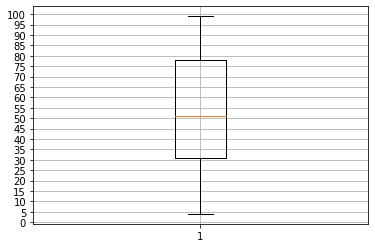

In [1]:
import numpy as np
import matplotlib.pyplot as plt

edades = np.array([4, 17, 29, 33, 50, 51, 61, 71, 85, 92, 99])

plt.yticks(np.arange(0, 110, 5))
plt.grid(True)
plt.boxplot(edades)
plt.show()


In [2]:
(np.min(edades), np.quantile(edades, 0.25), np.median(edades),
np.quantile(edades, 0.75), np.max(edades))
(4, 31.0, 51.0, 78.0, 99)


(4, 31.0, 51.0, 78.0, 99)

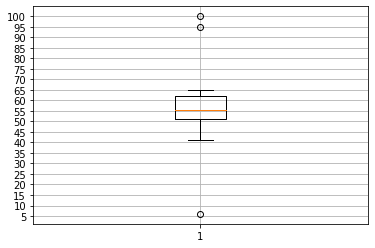

In [3]:
edades = np.array([6, 
                   41, 51, 51, 52, 54, 57, 60, 61, 65, 
                   95, 100])

plt.grid(True)
plt.yticks(np.arange(0, 110, 5))
plt.boxplot(edades)
plt.show()